In [2]:
import pandas as pd
import datetime as dt
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter
import matplotlib.pyplot as plt
import numpy as np
from uszipcode import SearchEngine
import seaborn as sns
import pickle
%matplotlib inline

# Load the Data

In [3]:
df = pd.read_csv("data/assessments.csv",low_memory=False)
pd.set_option('display.max_rows', 200)

In [14]:
df1 = pickle.load(open("data/cleaned_data.pkl", "rb"))

# EDA

In [5]:
import seaborn as sns

In [15]:
df2 = df1.copy()
df2['log(price)'] = np.log(df2['SALEPRICE'])
df2 = df2.drop(columns=["SALEPRICE"])

In [7]:
corr = df2.corr()

<AxesSubplot:>

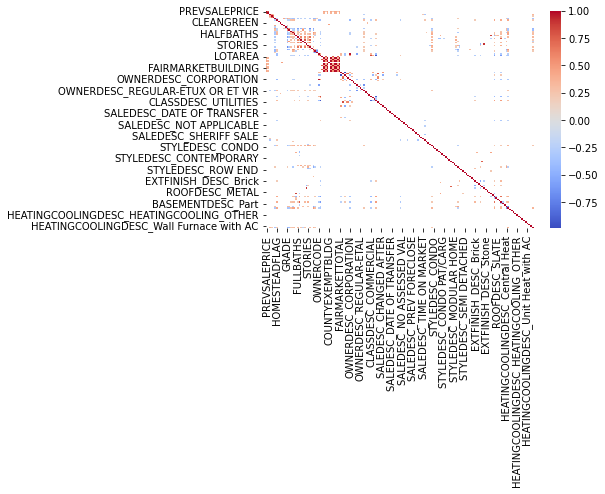

In [8]:
sns.heatmap(corr[abs(corr)>0.2], cmap='coolwarm')

In [9]:
corr['log(price)'][(abs(corr['log(price)'])>0.2) & (corr['log(price)']!=1)].sort_values()

GRADE                                     -0.452046
CDUDESC                                   -0.403279
SCHOOL_Ranking                            -0.352726
CONDITION                                 -0.205950
MUNICODE                                   0.210986
Timestamp1                                 0.218862
FIREPLACES                                 0.223759
TOTALROOMS                                 0.227147
STYLEDESC_COLONIAL                         0.241099
HOMESTEADFLAG                              0.241489
BEDROOMS                                   0.257507
BSMTGARAGE                                 0.276721
FINISHEDLIVINGAREA                         0.289769
HALFBATHS                                  0.313775
Timestamp0                                 0.338146
FULLBATHS                                  0.345163
YEARBLT                                    0.354680
HEATINGCOOLINGDESC_Central Heat with AC    0.360414
log(price)                                 1.000000
Name: log(pr

In [16]:
df3 = df1.sample(n=10000, random_state=11)
df3['log(price)'] = np.log(df1['SALEPRICE'])

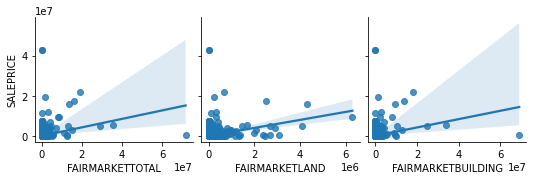

In [18]:
sns.pairplot(df3, 
    y_vars=['SALEPRICE'],
    x_vars=['FAIRMARKETTOTAL','FAIRMARKETLAND', 'FAIRMARKETBUILDING'],
    kind='reg', diag_kind='kde')

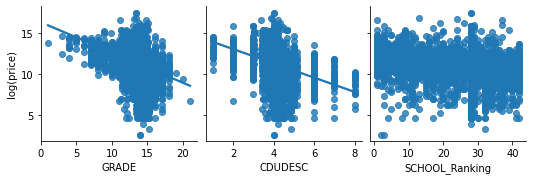

In [19]:
sns.pairplot(df3, 
    y_vars=['log(price)'],
    x_vars=['GRADE', 'CDUDESC', 'SCHOOL_Ranking'],
    kind='reg', diag_kind='kde')

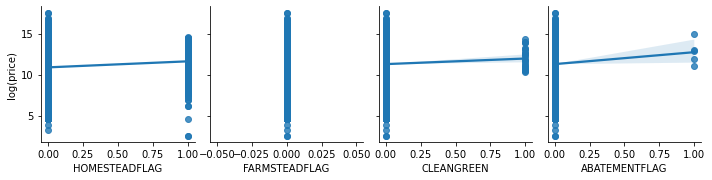

In [20]:
sns.pairplot(df3, 
    y_vars=['log(price)'],
    x_vars=['HOMESTEADFLAG', 'FARMSTEADFLAG', 'CLEANGREEN', 'ABATEMENTFLAG'],
    kind='reg', diag_kind='kde')

In [34]:
df1['FARMSTEADFLAG'].unique()

array([0, 1])

In [35]:
df3['FARMSTEADFLAG'].unique()

array([0])

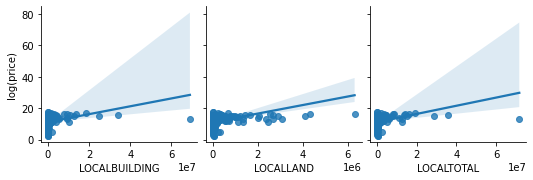

In [21]:
sns.pairplot(df3, 
    y_vars=['log(price)'],
    x_vars=['LOCALBUILDING', 'LOCALLAND', 'LOCALTOTAL'],
    kind='reg', diag_kind='kde')

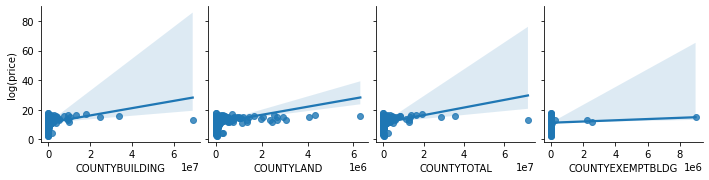

In [22]:
sns.pairplot(df3, 
    y_vars=['log(price)'],
    x_vars=['COUNTYBUILDING', 'COUNTYLAND', 'COUNTYTOTAL', 'COUNTYEXEMPTBLDG'],
    kind='reg', diag_kind='kde')


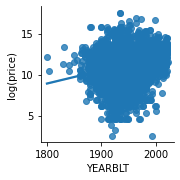

In [23]:
sns.pairplot(df3, 
    y_vars=['log(price)'],
    x_vars=['YEARBLT'],
    kind='reg', diag_kind='kde')

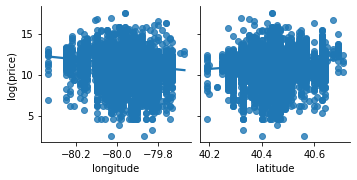

In [24]:
sns.pairplot(df3, 
    y_vars=['log(price)'],
    x_vars=["longitude","latitude" ],
    kind='reg', diag_kind='kde')

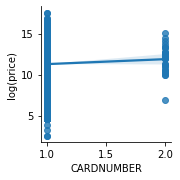

In [25]:
sns.pairplot(df3, 
    y_vars=['log(price)'],
    x_vars=['CARDNUMBER'],
    kind='reg', diag_kind='kde')

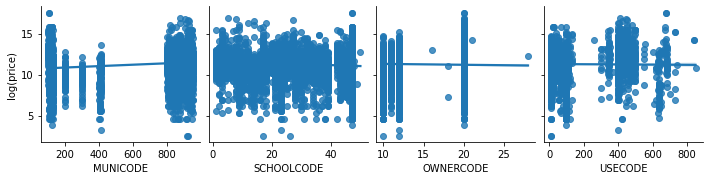

In [26]:
sns.pairplot(df3, 
    y_vars=['log(price)'],
    x_vars=['MUNICODE','SCHOOLCODE', 'OWNERCODE', 'USECODE' ],
    kind='reg', diag_kind='kde')

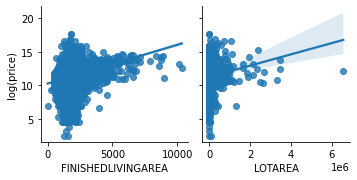

In [27]:
sns.pairplot(df3, 
    y_vars=['log(price)'],
    x_vars=['FINISHEDLIVINGAREA', 'LOTAREA' ],
    kind='reg', diag_kind='kde')

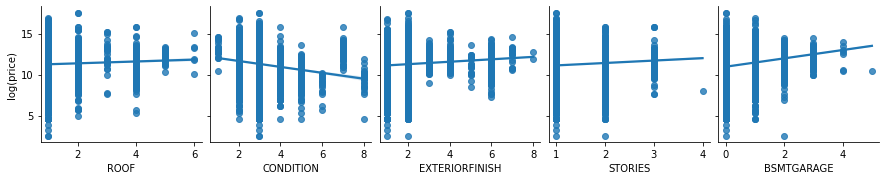

In [28]:
sns.pairplot(df3, 
    y_vars=['log(price)'],
    x_vars=['ROOF', 'CONDITION', 'EXTERIORFINISH', 'STORIES', 'BSMTGARAGE'],
    kind='reg', diag_kind='kde')

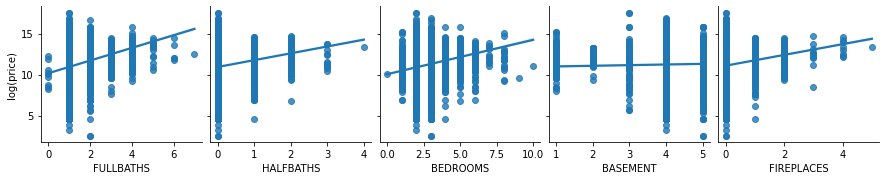

In [29]:
sns.pairplot(df3, 
    y_vars=['log(price)'],
    x_vars=['FULLBATHS', 'HALFBATHS', 'BEDROOMS' ,'BASEMENT', 'FIREPLACES'],
    kind='reg', diag_kind='kde')

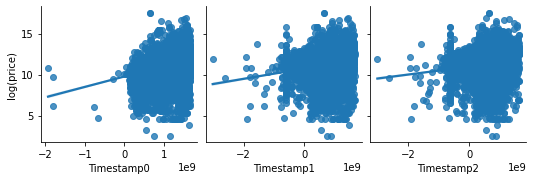

In [30]:
sns.pairplot(df3, 
    y_vars=['log(price)'],
    x_vars=['Timestamp0','Timestamp1','Timestamp2'],
    kind='reg', diag_kind='kde')

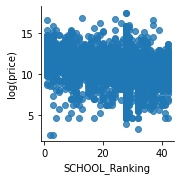

In [31]:
sns.pairplot(df3, 
    y_vars=['log(price)'],
    x_vars=['SCHOOL_Ranking'],
    kind='reg', diag_kind='kde')

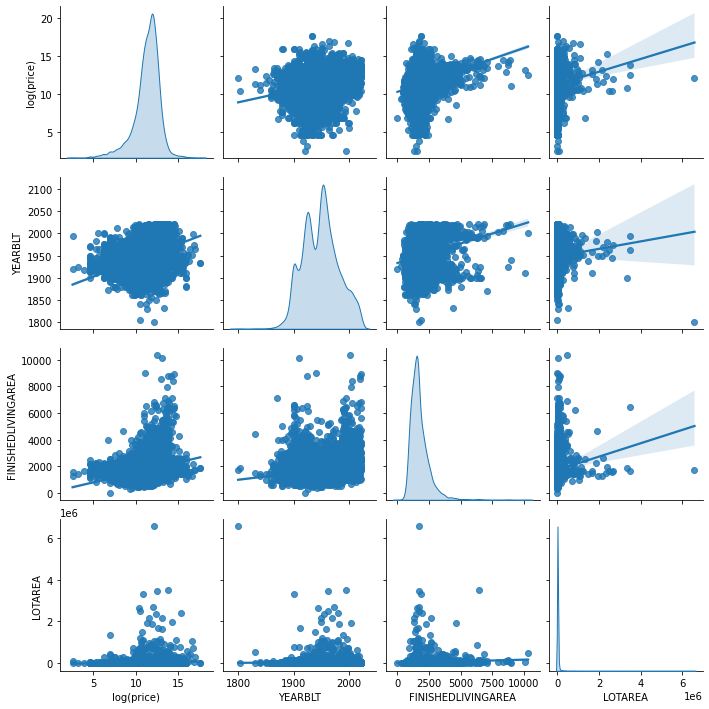

In [32]:
sns.pairplot(df3, 
    vars=['log(price)','YEARBLT','FINISHEDLIVINGAREA','LOTAREA'],
    kind='reg', diag_kind='kde')